In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_052_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_050_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_080_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_008_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_097_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_041_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_048_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_028_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_012_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_039_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x4 URban100/img_025_SRF_4_HR.png
/kaggle/input/urban100/Urban 100/X4 Urban100/X4/HIGH x

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.4722 - loss: 0.6994 - val_accuracy: 0.4500 - val_loss: 0.6950
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5770 - loss: 0.6908 - val_accuracy: 0.4000 - val_loss: 0.7339
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5620 - loss: 0.7041 - val_accuracy: 0.4000 - val_loss: 0.6989
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5134 - loss: 0.6925 - val_accuracy: 0.4000 - val_loss: 0.7117
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5734 - loss: 0.6877 - val_accuracy: 0.4000 - val_loss: 0.7240
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5069 - loss: 0.6853 - val_accuracy: 0.4000 - val_loss: 0.8527
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4642 - loss: 0.7306 - val_accuracy: 0.4000 - val_loss: 0.7488
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5492 - loss: 0.6557 - val_accuracy: 0.3000 - v

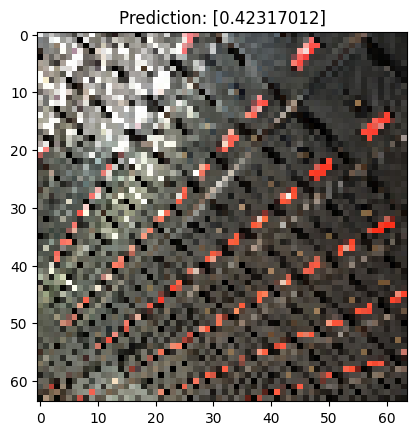

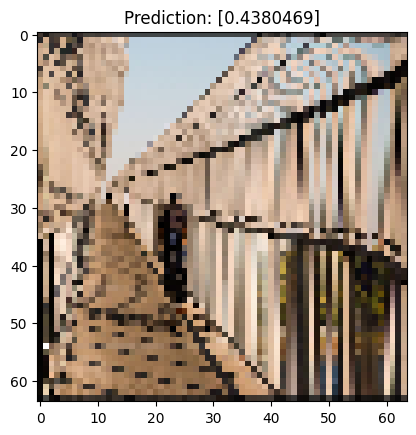

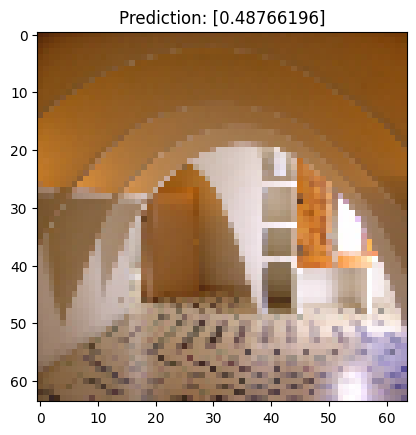

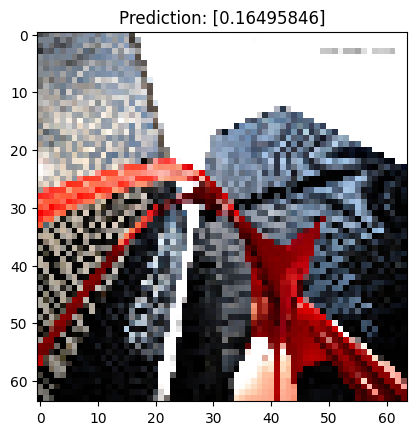

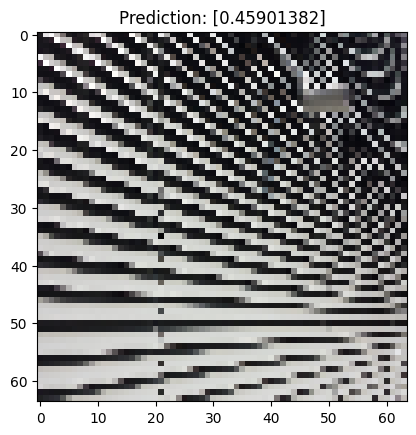

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing import image

# Function to load and preprocess Urban100 images
def load_and_preprocess_images(image_folder, image_size=(64, 64)):
    images = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".png"):  # Assuming Urban100 images are in PNG format
            img_path = os.path.join(image_folder, filename)
            img = image.load_img(img_path, target_size=image_size)
            img_array = image.img_to_array(img)
            img_array /= 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
    return np.array(images)

# Load Urban100 images (assuming the dataset is in the 'urban100' folder)
image_folder = "/kaggle/input/urban100/Urban 100/X2 Urban100/X2/HIGH X2 Urban"
X = load_and_preprocess_images(image_folder, image_size=(64, 64))

# Generate dummy labels for the images (binary classification in this case)
y = np.random.randint(0, 2, X.shape[0])

# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN-LSTM model definition
def cnn_lstm_model(input_shape):
    model = models.Sequential()
    
    # CNN layers for feature extraction
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the 3D tensor to a 1D vector for LSTM
    model.add(layers.Flatten())
    
    # Reshape the input for the LSTM layer
    model.add(layers.Reshape((-1, 128)))  # Here -1 allows the network to figure out batch size automatically
    
    # LSTM layer for sequence processing
    model.add(layers.LSTM(64))
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Define the model with input shape matching the Urban100 images (64x64x3)
model = cnn_lstm_model(input_shape=X_train.shape[1:])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc}")

# Make predictions on validation data
predictions = model.predict(X_val)

# Visualize the predictions
for i in range(5):
    plt.imshow(X_val[i])
    plt.title(f"Prediction: {predictions[i]}")
    plt.show()
